In [24]:
import IPython
import os
os.system("ls *.md | grep -Ev 'README|audris|ports' | sed 's/\.md$//'| sort -u >ghids.txt")
with open('ghids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

['alexklibisz', 'almasaeed2010', 'awachte', 'beamad12', 'chumekaboom', 'codyjae', 'curtis017', 'cwilker', 'davpcunn', 'gsimpson723', 'inthesunset', 'jalomas7', 'jaredmichaelsmith', 'jherold2', 'jking018', 'jlong49', 'joseph346', 'jtyler7', 'justa-ghost', 'kdunn13', 'kylebshr', 'matsuobasho', 'mbenkhayal', 'milanjpatel', 'millermoore', 'mtwe', 'nateige', 'nwilder0', 'rerwin21', 'rhoque-icl', 'rroper1', 'ryancaldwell1', 'ryanwagn', 'sbradfo5', 'spicychckn', 'stonecoldhughes', 'tapjdey', 'teaguejt', 'tjonesster', 'w4d3']


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  str = a.read()
  documents .append(str)
  text = text + " " + str
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [26]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

alexklibisz        almasaeed2010  \
alexklibisz                      1.000                0.100   
almasaeed2010                    0.100                1.000   
awachte                          0.108                0.126   
beamad12                         0.163                0.136   
chumekaboom                      0.124                0.078   
codyjae                          0.147                0.084   
curtis017                        0.130                0.155   
cwilker                          0.153                0.101   
davpcunn                         0.061                0.067   
gsimpson723                      0.141                0.221   
inthesunset                      0.127                0.084   
jalomas7                         0.174                0.138   
jaredmichaelsmith                0.197                0.159   
jherold2                         0.150                0.104   
jking018                         0.138                0.070   
jlong49                          0.052                0.061   
joseph346                        0.082                0.131   
jtyler7                          0.163                0.068   
justa-ghost                      0.068                0.047   
kdunn13                          0.146                0.162   
kylebshr                         0.132                0.106   
matsuobasho                      0.137                0.033   
mbenkhayal                       0.149                0.101   
milanjpatel                      0.088                0.094   
millermoore                      0.148                0.045   
mtwe                             0.119                0.111   
nateige                          0.097                0.156   
nwilder0                         0.150                0.076   
rerwin21                         0.112                0.076   
rhoque-icl                       0.103                0.027   
rroper1                          0.154                0.088   
ryancaldwell1                    0.129                0.101   
ryanwagn                         0.060                0.055   
sbradfo5                         0.115                0.210   
spicychckn                       0.089                0.067   
stonecoldhughes                  0.118                0.094   
tapjdey                          0.130                0.060   
teaguejt                         0.192                0.133   
tjonesster                       0.044                0.037   
w4d3                             0.133                0.076   

                               awachte             beamad12  \
alexklibisz                      0.108                0.163   
almasaeed2010                    0.126                0.136   
awachte                          1.000                0.200   
beamad12                         0.200                1.000   
chumekaboom                      0.072                0.133   
codyjae                          0.129                0.158   
curtis017                        0.121                0.222   
cwilker                          0.142                0.234   
davpcunn                         0.049                0.078   
gsimpson723                      0.156                0.092   
inthesunset                      0.159                0.138   
jalomas7                         0.156                0.233   
jaredmichaelsmith                0.143                0.180   
jherold2                         0.166                0.239   
jking018                         0.082                0.130   
jlong49                          0.091                0.117   
joseph346                        0.100                0.152   
jtyler7                          0.168                0.268   
justa-ghost                      0.048                0.133   
kdunn13                          0.221                0.191   
kylebshr                         0.132                0.138   
matsuobasho                      0.095                0.1

1.3830086849530625


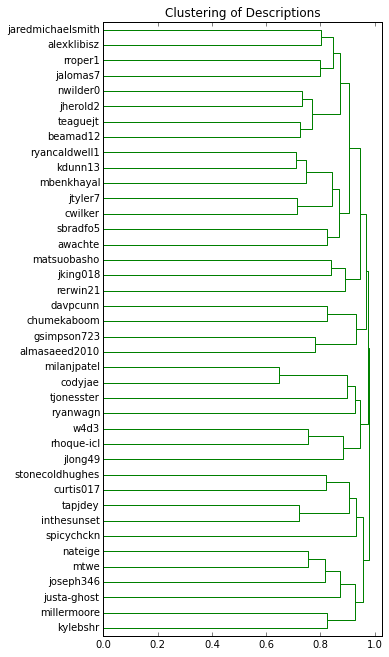

In [27]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline
# Clean up labels (remove .md at the end)
flab = files
for i in range(len(files)):
    flab[i] = re.sub(r"\.[mM][dD]$", "", files[i])


dist2 = pdist(tfidf.A, 'euclidean')
#dist ij = dist2 [i*(n-1)+j]
ab = np.dot(tfidf.A[0,:]-tfidf.A[38,:],tfidf.A[0,:]-tfidf.A[38,:])
aa = np.dot(tfidf.A[0,:],tfidf.A[0,:])
bb = np.dot(tfidf.A[38,:],tfidf.A[38,:])
print(math.sqrt(ab/aa/bb))


# Calculate cosine distance (clustering needs distance, not similarity)   
dist1 = pdist(tfidf.A, 'cosine')
# Do clustering
linkage_matrix = linkage(dist1,method='complete')
#print(linkage_matrix)
# Plot results
plt.figure(1, figsize=(5, 11))
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,
               )
plt.title("Clustering of Descriptions")


In [28]:
import networkx as nx
import json
nxg = nx.Graph()

for i in range(len(files)-1):
    for j in range(i+1,len(files)):
        if (df.iloc[i,j] > .2):
            nxg.add_edge(flab[i], flab[j], weight=df.iloc[i,j],color='r')
    
print (nxg.nodes())

['inthesunset', 'jaredmichaelsmith', 'sbradfo5', 'beamad12', 'rerwin21', 'curtis017', 'milanjpatel', 'codyjae', 'rroper1', 'cwilker', 'nateige', 'jherold2', 'kdunn13', 'justa-ghost', 'mtwe', 'almasaeed2010', 'stonecoldhughes', 'chumekaboom', 'tapjdey', 'awachte', 'mbenkhayal', 'teaguejt', 'ryancaldwell1', 'nwilder0', 'jtyler7', 'w4d3', 'rhoque-icl', 'jalomas7', 'gsimpson723']


In [29]:
from networkx.readwrite import json_graph
nld = json_graph.node_link_data(nxg)
json.dump(nld, open('r/students.json','w'))

In [30]:
from IPython.display import IFrame
from IPython.core.display import display
# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.
viz_file = 'files/r/students.html'
display(IFrame(viz_file, '100%', '600px'))